In [2]:
!.\run.bat


C:\Users\Ђ«ҐЄб ­¤а \PROGRAM\Symmetry\mirror-symmetry>flake8

C:\Users\Ђ«ҐЄб ­¤а \PROGRAM\Symmetry\mirror-symmetry>python -m pytest -vv test 
============================= test session starts =============================
platform win32 -- Python 3.8.3, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- D:\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\Александра\PROGRAM\Symmetry\mirror-symmetry
collecting ... collected 14 items

test/test_contours.py::test_binarizer PASSED                             [  7%]
test/test_contours.py::test_contour PASSED                               [ 14%]
test/test_contours.py::test_sym_axis_list PASSED                         [ 21%]
test/test_contours.py::test_sym_contour PASSED                           [ 28%]
test/test_contours.py::test_contours_list PASSED                         [ 35%]
test/test_contours.py::test_datafolder PASSED                            [ 42%]
test/test_contours.py::test_fd PASSED                                    [ 50%]


In [1]:
%matplotlib inline

import os
from time import time

import numpy as np
from matplotlib import pyplot as plt

import zhu

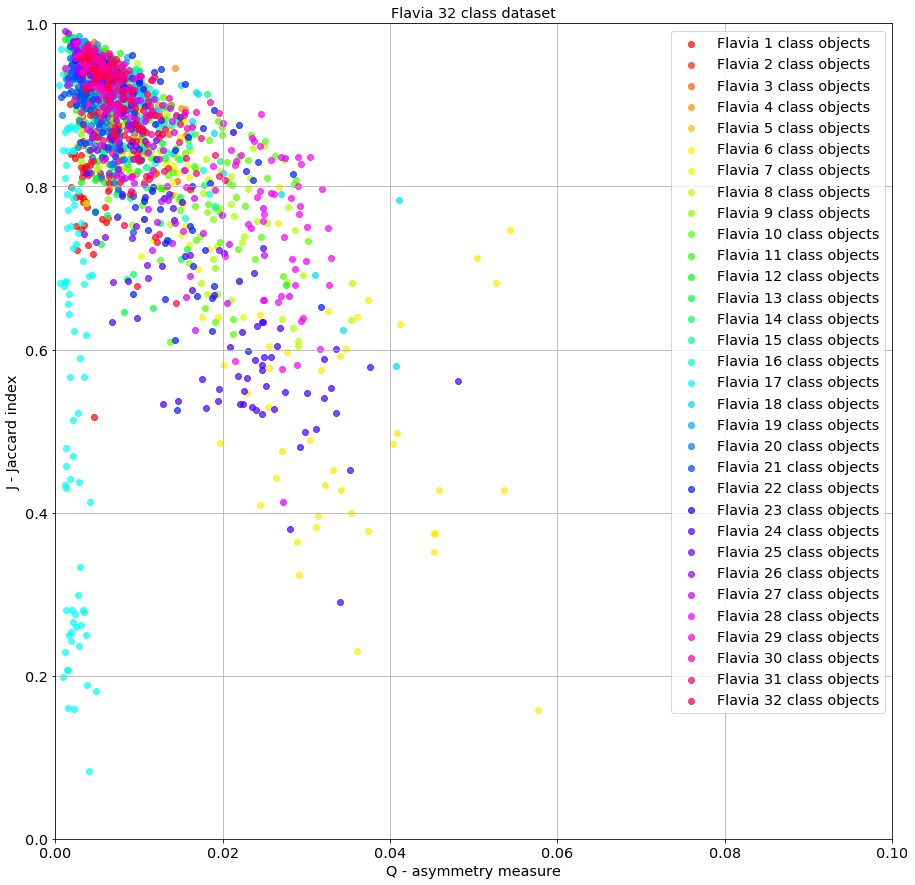

In [4]:
"""Asymmetry/Jaccard correlation"""
from experiments.vs_jaccard import VS_Jaccard
from zhu.draw_tools import save_plot
from other.rgb import MplColorHelper

save_all = False

filenames = [f"{i}.txt" for i in range(1, 33)]
my_folder = '../tmp_results'
so_folder = '../so_output'
color_helper = MplColorHelper('hsv', 0, len(filenames))
colors = color_helper.get_rgb_index()
for i, f in enumerate(filenames):
    my_f = my_folder + '/' + f
    so_f = so_folder + '/' + f
    vs = VS_Jaccard(my_f, so_f, '../vs_jaccard', f"Flavia {i+1} class")
    filename = f"flavia_{i+1}_vs_jaccard" if save_all else ''
    vs.scatter_plot(filename, 'png',
                    15, (0.0, 0.1), (0.0, 1.0), color=colors[i])
    if save_all:
        plt.show()
if not save_all:
    plt.grid()
    save_plot("confetti", "png", '../vs_jaccard')
    plt.show()

../data/fun/many_flies
fun/many_flies
0.08088235294117647
0.23225806451612904


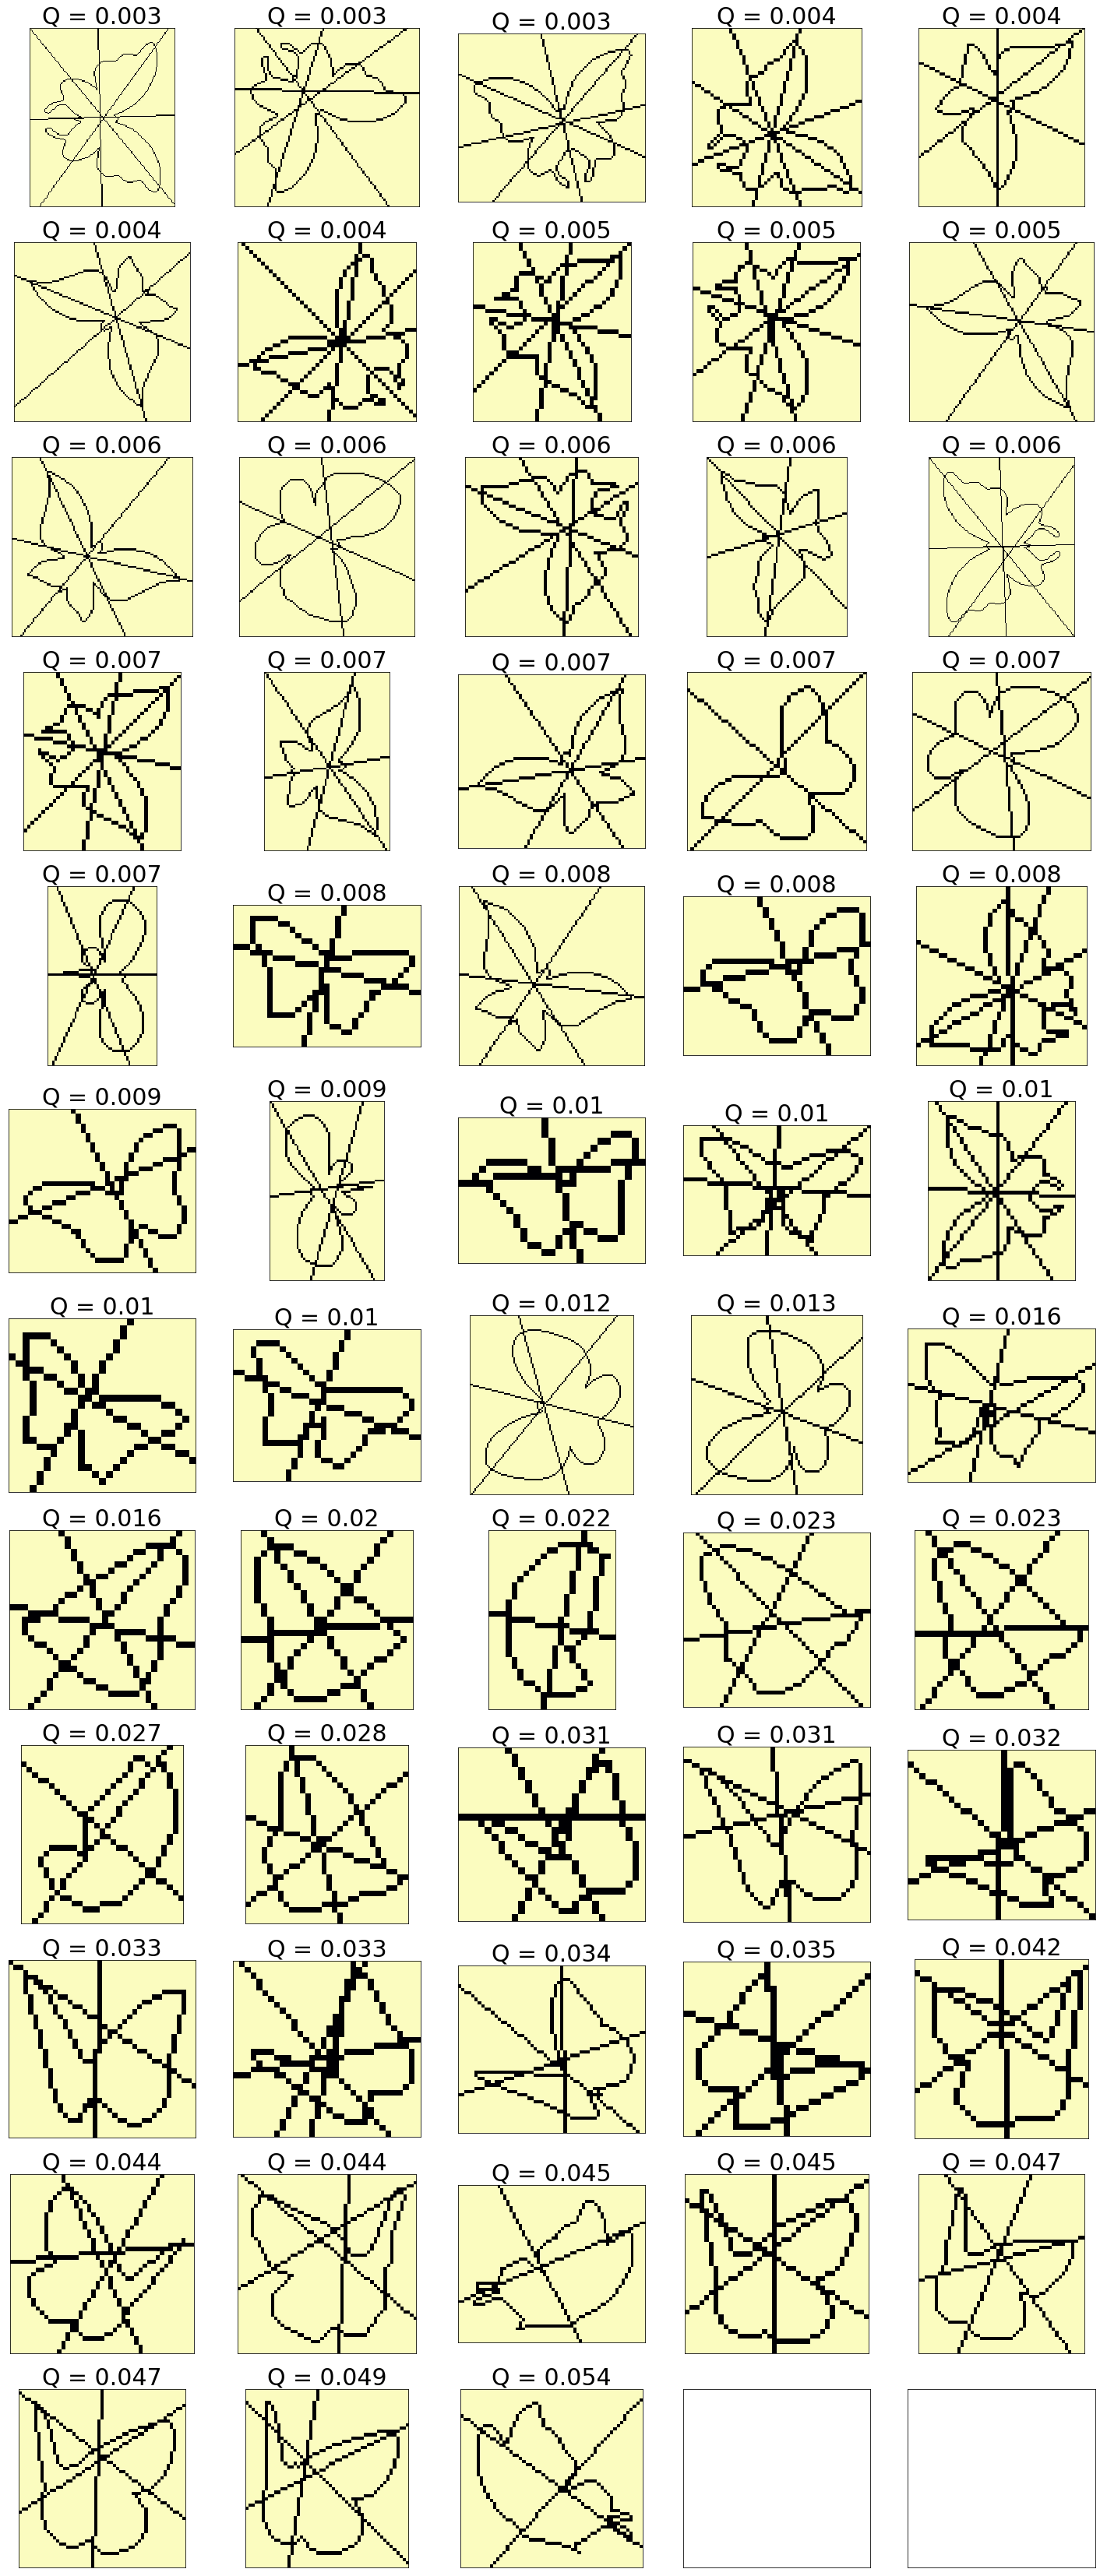

../data/06
06
0.034013605442176874
0.125


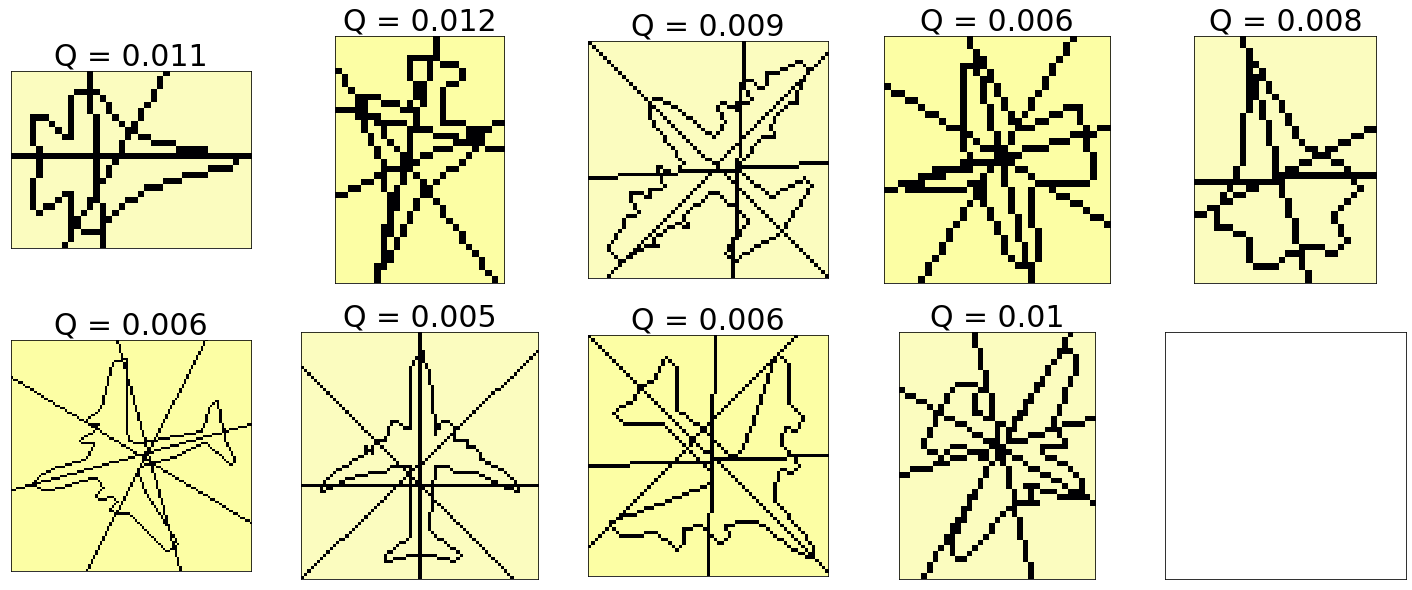

../data/03
03
0.04076086956521739
0.1111111111111111


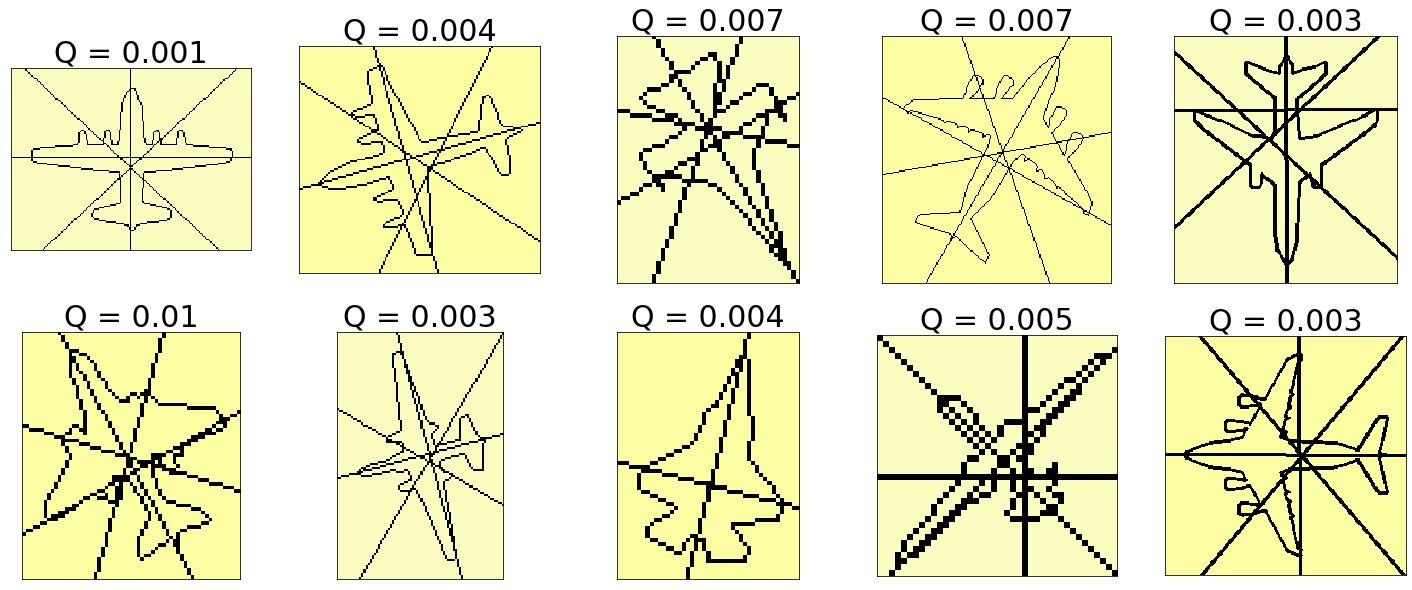

../data/masks_cleared
masks_cleared
0.042134831460674156
0.12109375


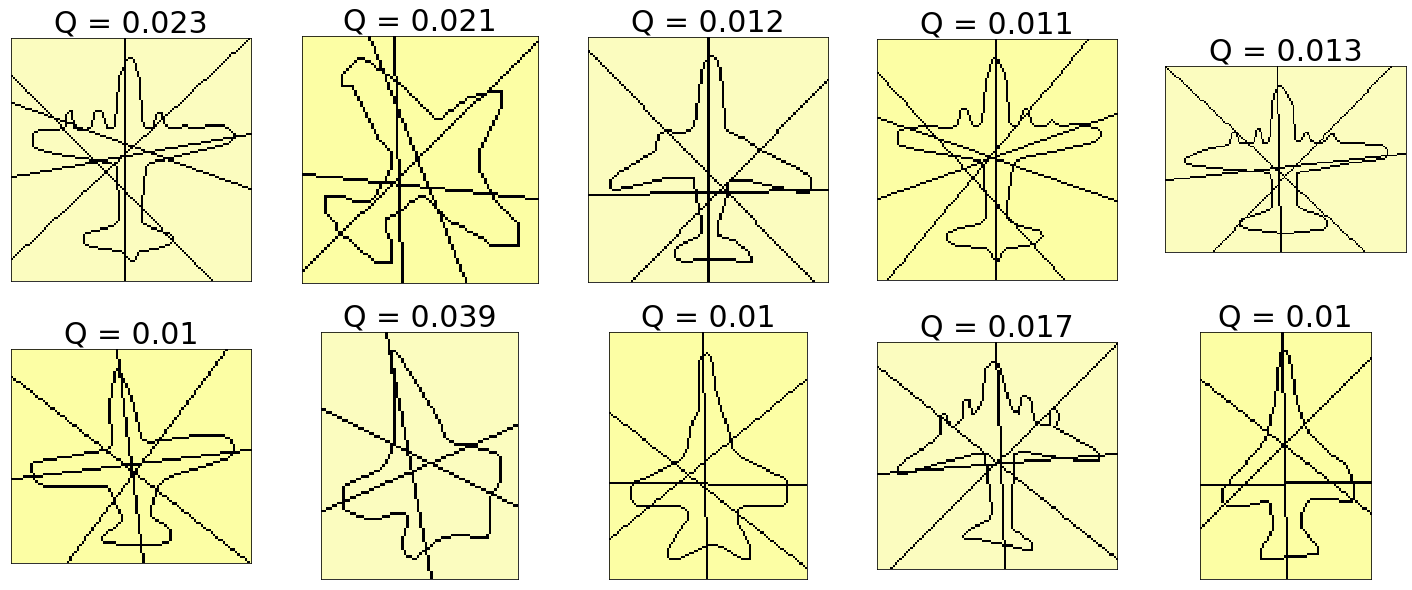

In [2]:
"""Train neibs"""
main_folder = '../data'
subfolders = ['fun/many_flies', '06', '03', 'masks_cleared']
s = zhu.Subploter(cols=5, rows=3)
cs_kw = {
    'mult_coef': 4,
    'beta_signal': 1.0,
    'neibs_hull': 1.0,
    'neibs_approximate': 1.0,
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': np.inf,
    'n_max_pixels': np.inf,
    'train_neibs': True
}
im_kw = {
    'single': False,
    'min_area': 200,
    'sym_contour_kwargs': cs_kw,
}
n = 10
s = zhu.Subploter()
for sf in subfolders:
    path = main_folder + '/' + sf
    print(path)
    df = zhu.DataFolder(path, im_kw, number=n)
    print(sf)
    print(df.Trained_neibs_hull)
    print(df.Trained_neibs_appr)
    s.plot(s.folder(df))
    plt.show()

fun/many_flies
Time = 4.392 s.


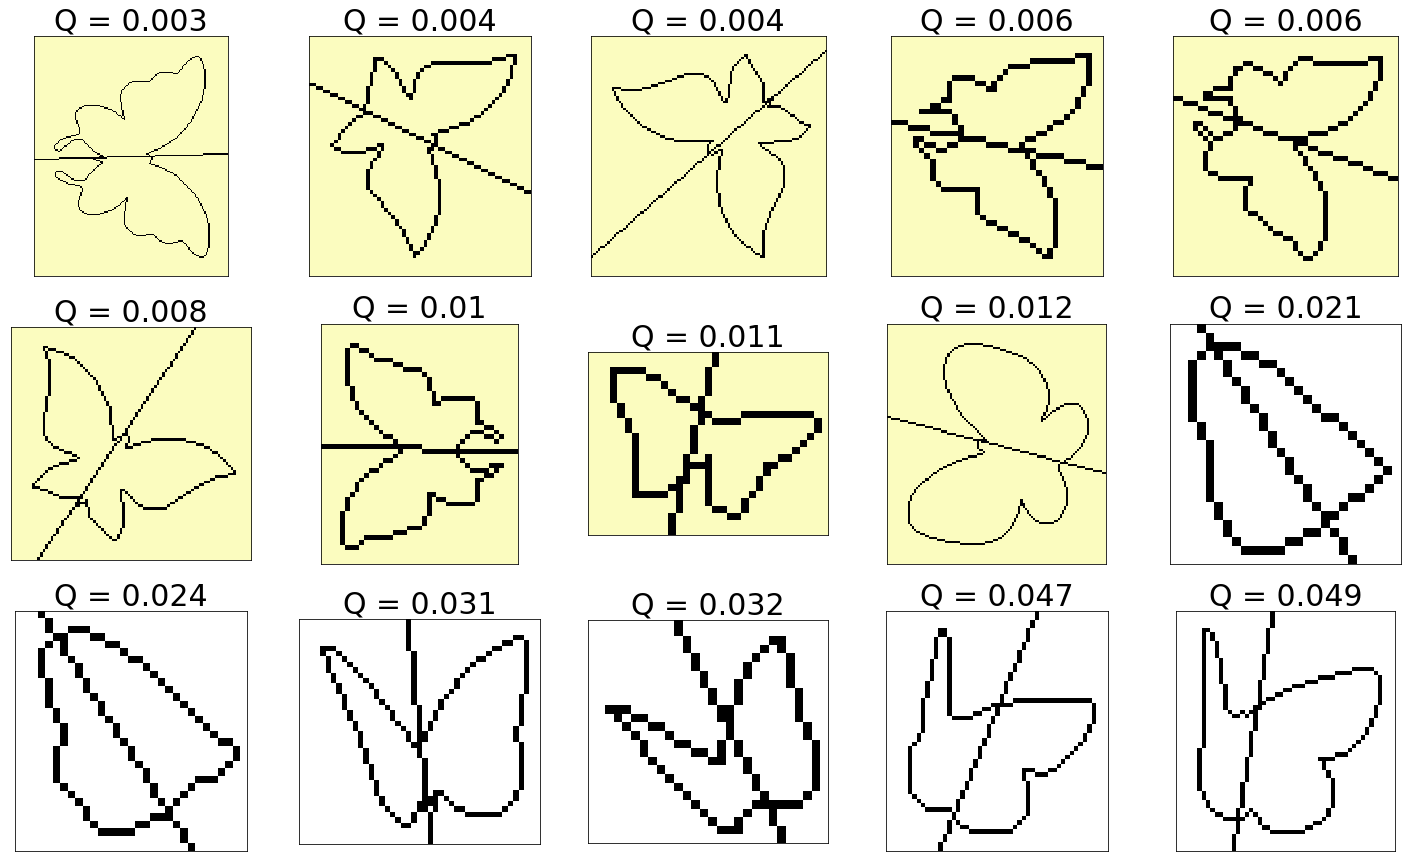

In [5]:
"""Flies pose classification example"""
main_folder = '../data'
subfolders = ['fun/many_flies']
np.random.seed(13)
s = zhu.Subploter(cols=5, rows=3)
cs_kw = {
    'q_max_signal': 0.05,
    'q_max_pixels': 0.02,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'single': False,
    'min_area': 200,
    'sym_contour_kwargs': cs_kw,
}
s.parent_folder(main_folder, subfolders, sym_image_kwargs=im_kw)

06
Time = 3.536 s.


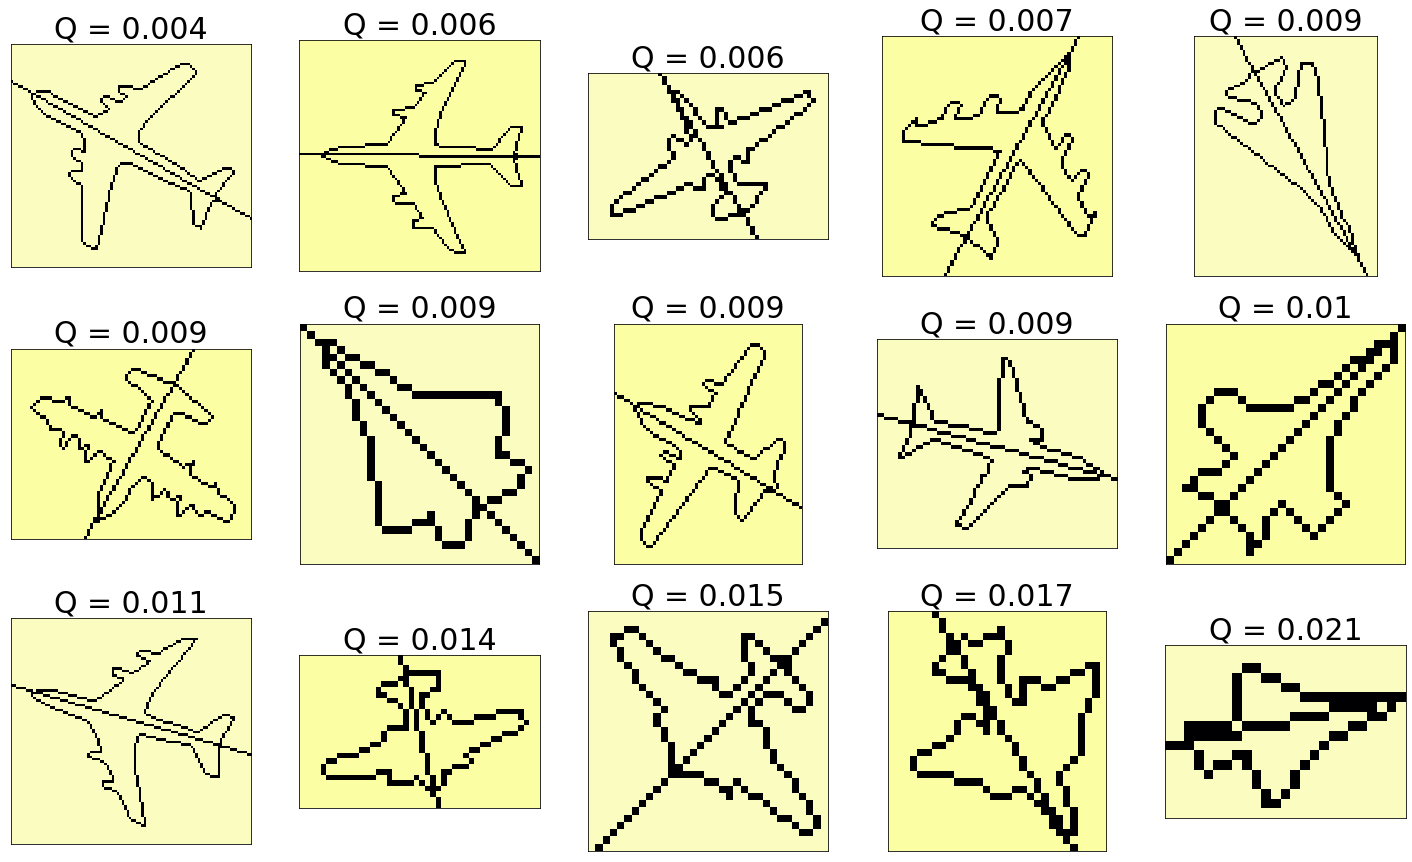

03
Time = 3.993 s.


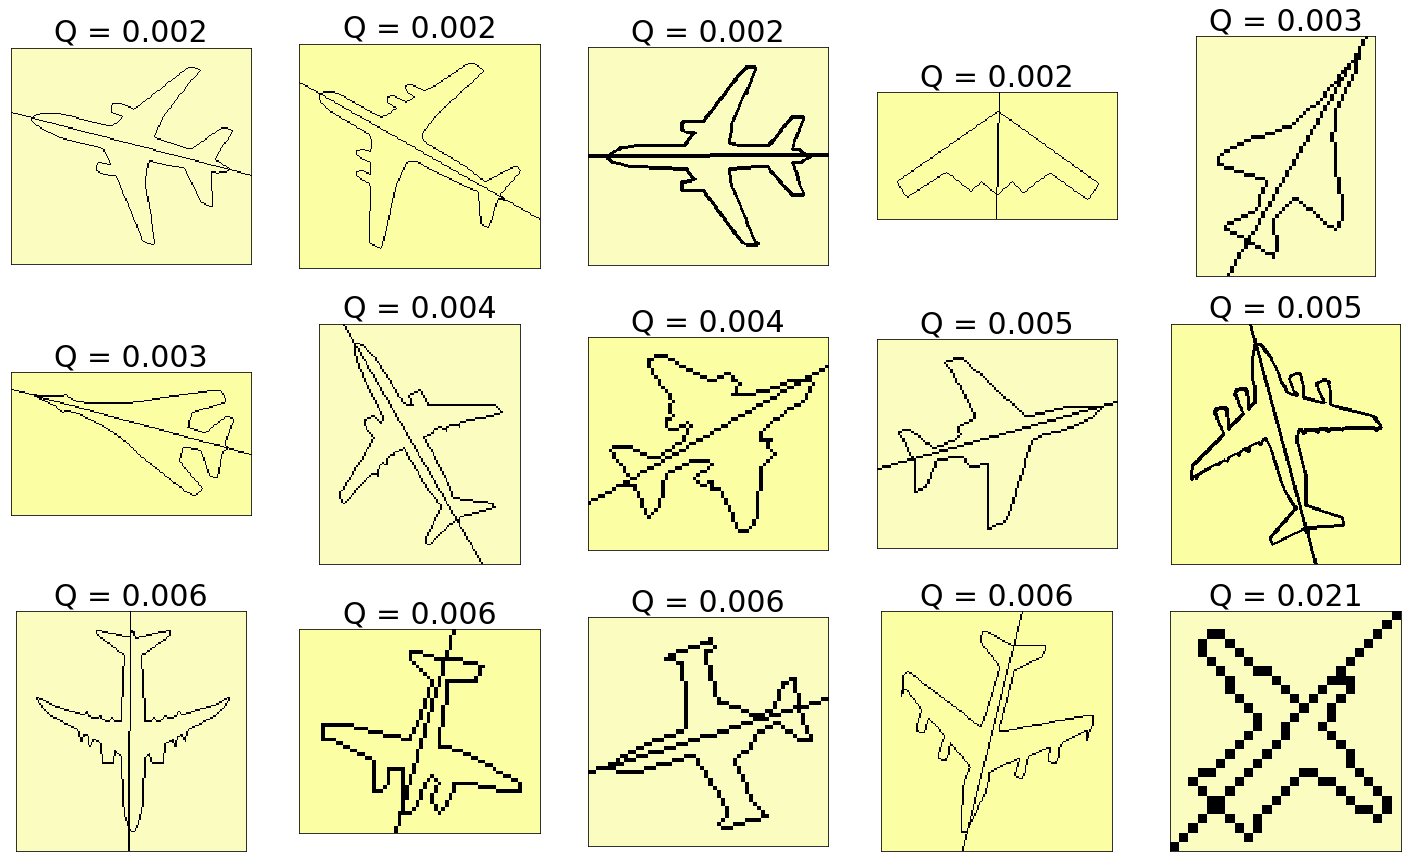

masks_cleared
Time = 3.504 s.


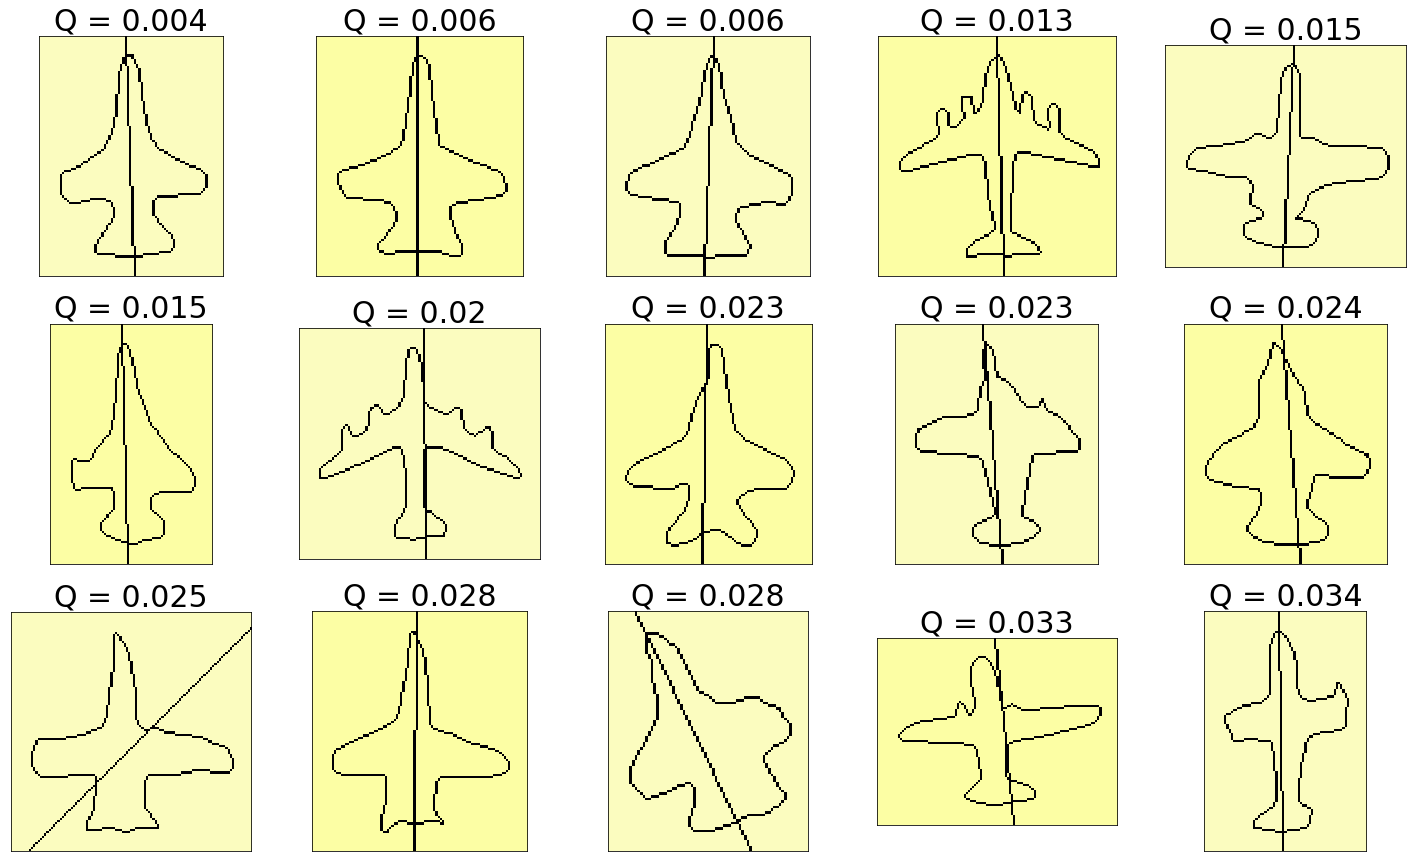

In [6]:
"""Plane simmetry axis examples"""
main_folder = '../data'
subfolders1 = ['06', '03']
subfolders2 = ['masks_cleared']
np.random.seed(4)
sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'sym_contour_kwargs': sc_kw
}
s = zhu.Subploter(cols=5, rows=3)
s.parent_folder(main_folder, subfolders1, sym_image_kwargs=im_kw)
np.random.seed(9)
s.parent_folder(main_folder, subfolders2, sym_image_kwargs=im_kw)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


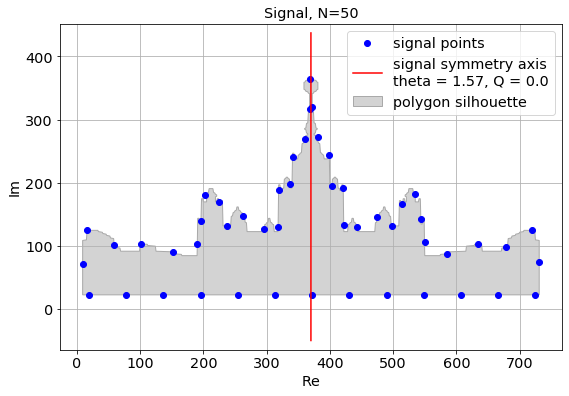

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


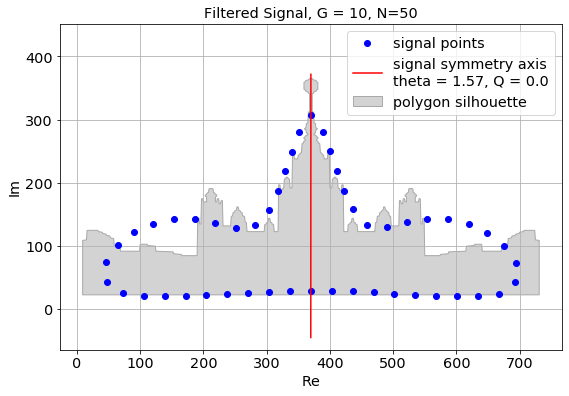

In [8]:
"""Contour frequency filtering example"""
res_folder = '../LaTeX/master/to_master/filter'
data_folder = '../data'

image_folder = data_folder + '/to_master'
image_name = 'MSU.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=9, height=6, save_folder=res_folder)
d.plot_signal([cnt.Axis_list.lines[0]])
xlim = plt.xlim()
ylim = plt.ylim()
d.save(image.name + '_signal_sym')
d.plot_filter(0.18)
plt.xlim(xlim)
plt.ylim(ylim)
d.save(image.name + '_filter_sym')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


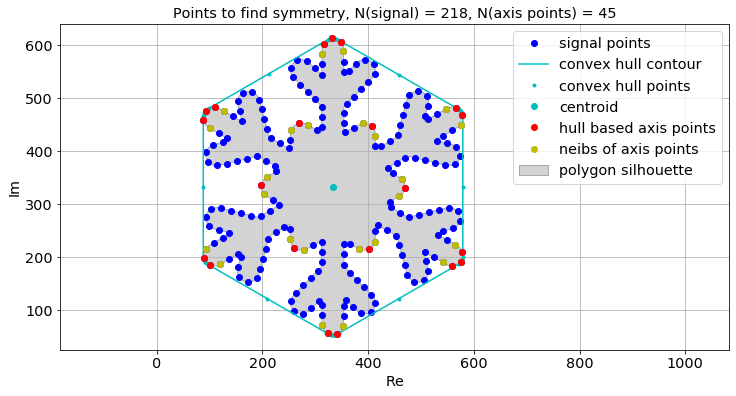

In [9]:
"""Hull based example"""
res_folder = '../LaTeX/master/to_master/hull'
data_folder = '../data'

image_folder = data_folder + '/to_master'
image_name = 'snow.bmp'

sc_kw = {
    'mult_coef': 0.5,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=12, height=6,
                      save_format='eps', save_folder=res_folder)
d.plot_signal()
d.plot_hull(neibs=0.01)
plt.xlim(0, 900)
d.save(image.name + '_hull')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


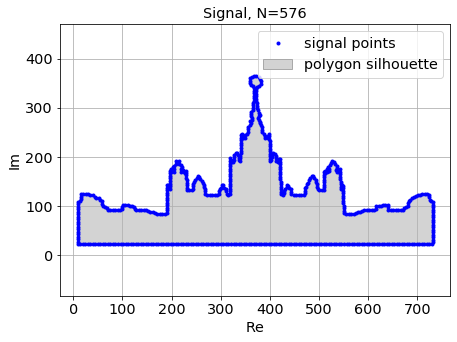

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


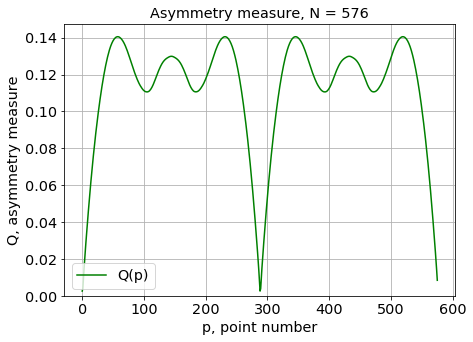

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


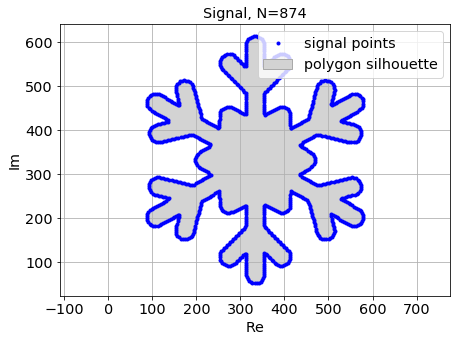

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


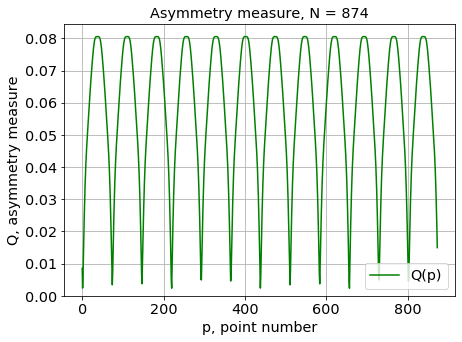

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


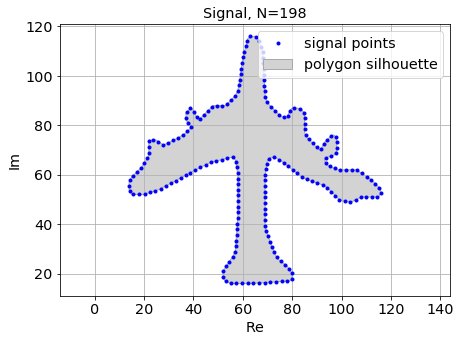

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


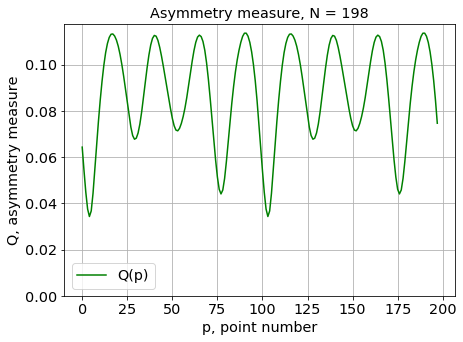

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


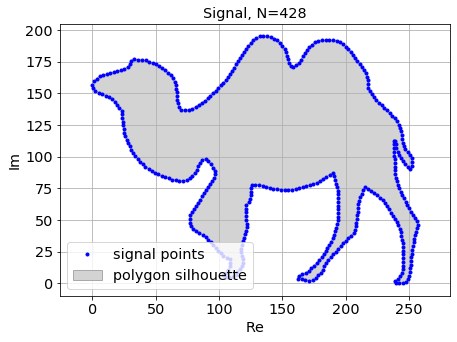

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


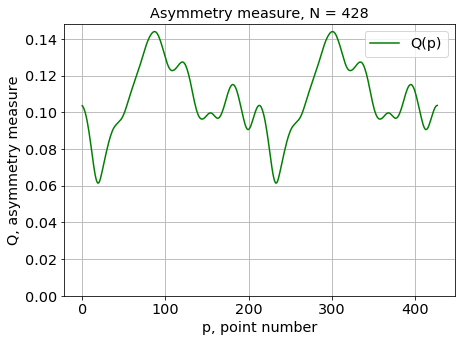

In [10]:
"""Symmetry measure examples"""
res_folder = '../LaTeX/master/to_master/measure'
data_folder = '../data'

image_folder = data_folder + '/to_master'
image_names = ['MSU.bmp', 'snow.bmp', '895.mask.bmp', 'camel.bmp']

for image_name in image_names:
    sc_kw = {
        'mult_coef': 2,
    }
    image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
    cnt = image.Contours_list[0]
    d = zhu.SymContourDrawer(cnt, width=7, height=5,
                          save_format='eps', save_folder=res_folder)
    d.signal_point_marker = 'b.'
    d.plot_signal()
    d.save(image.name+'_signal')
    d.plot_q()
    d.save(image.name + '_q')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


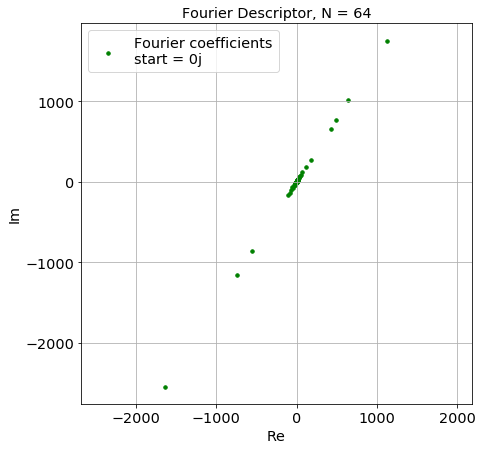

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


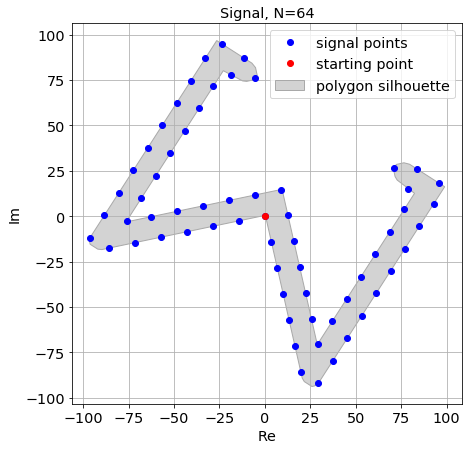

27:20: E225 missing whitespace around operator


In [11]:
"""Fourier descriptor for symmetrycal shape example"""
res_folder = r'../LaTeX/master/to_master/beamer'
data_folder = '../data'

image_folder = data_folder + '/truesym_examples'
image_name = 'sigma.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
u = cnt.origin * np.exp(1j) + 50 - 158j
cnt = zhu.SymContour(u)
d = zhu.SymContourDrawer(cnt, width=7, height=7,
                      save_format='eps', save_folder=res_folder)
fd = zhu.FourierDescriptor(cnt.Signal)
s_sym = np.argmin([fd.symmetry_measure(s) for s in range(len(fd))])

s2 = d.plot_f(s_sym, ret_zero=True)
d.save(image.name + '_fd_sym')

d.plot_signal()
plt.plot([np.real(s2)], [np.imag(s2)], 'ro',
         label='starting point')
d.save(image.name +'_discrete2')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


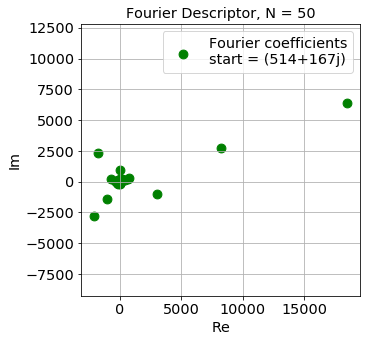

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


set


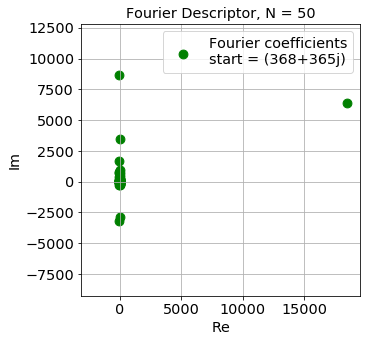

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


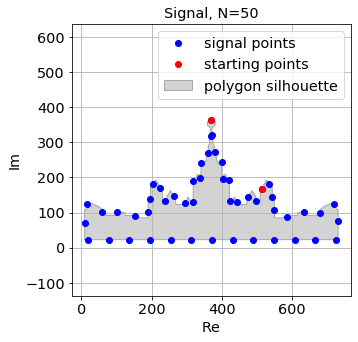

In [12]:
"""Fourier descriptor examples"""
res_folder = r'../LaTeX/master/to_master/borders'
data_folder = '../data'

image_folder = data_folder + '/msu'
image_name = 'MSU.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=5, height=5,
                      save_format='eps', save_folder=res_folder)
fd = zhu.FourierDescriptor(cnt.Signal)
s_sym = np.argmin([fd.symmetry_measure(s) for s in range(len(fd))])
s_anti = 10 if s_sym != 10 else np.random.randint(len(fd))
assert s_sym != s_anti

s1 = d.plot_f(s_anti, ret_zero=True, set_limits=True)
d.save('msu_fd_anti')

s2 = d.plot_f(s_sym, ret_zero=True)
d.save('msu_fd_sym')

d.plot_signal()
plt.plot([np.real(s1), np.real(s2)], [np.imag(s1), np.imag(s2)], 'ro',
         label='starting points')
plt.ylim(0, 500)
d.save('msu_discrete2')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


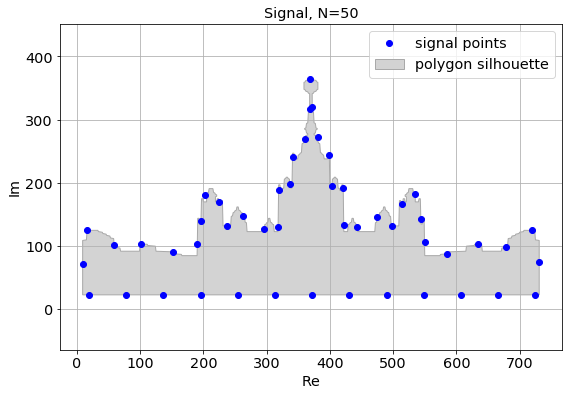

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


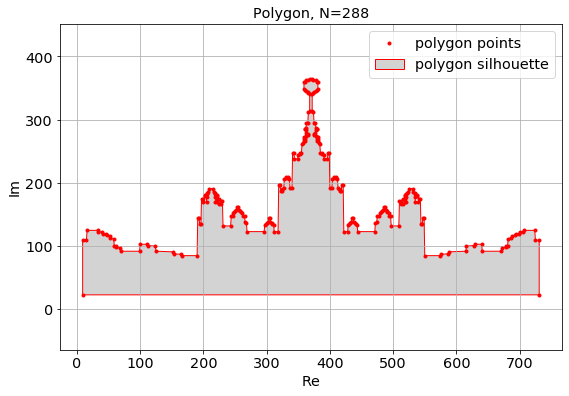

In [13]:
"""Boundary polygon and discretisation examples"""
res_folder = r'../LaTeX/master/to_master/descriptor'
data_folder = '../data'

image_folder = data_folder + '/msu'
image_name = 'MSU.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=9, height=6, save_folder=res_folder)

d.plot_signal()
d.save('msu_discrete')

d.origin_edge_color = 'r'
d.plot()
d.save('msu_polygon')

camel
Time = 6.784 s.


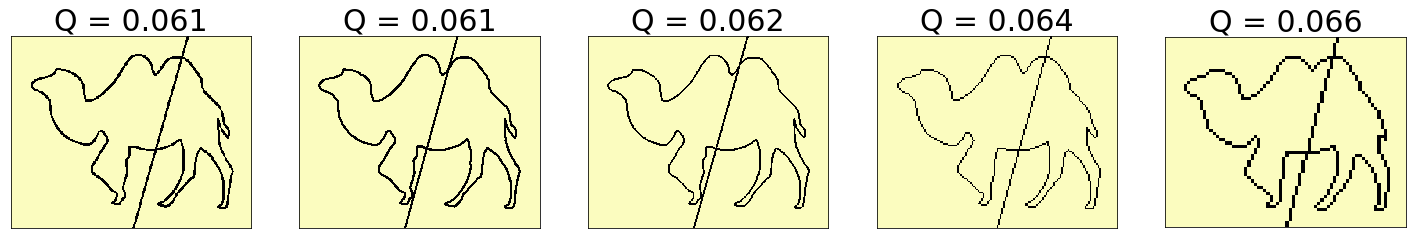

plane
Time = 6.444 s.


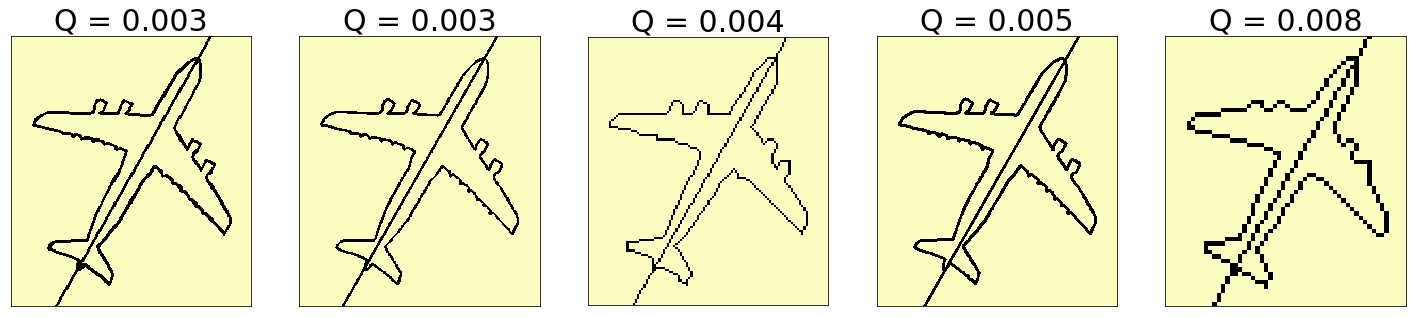

In [14]:
"""Be sure that scaling doesn't metter"""
main_folder = '../data/scaled'
s = zhu.Subploter(allow_multiple_lines=False,
                  cmap_changing=False)
s.parent_folder(main_folder)

In [ ]:
"""Write results to be used in Sonya's experiments"""
sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 4,
    'n_max_pixels': 2,
}
im_kw = {
    'sym_contour_kwargs': sc_kw
}

rw = zhu.ResultWriter(timeit_number=3, force_single_axis=False)
rw.parent_folder('../data/Flavia', res_folder='tmp_results', sym_image_kwargs=im_kw)

In [ ]:
"""Write results to be used in Sonya's experiments"""
sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'sym_contour_kwargs': sc_kw
}

rw = zhu.ResultWriter(timeit_number=3, force_single_axis=True)
rw.parent_folder('../data', subfolders=['butterfly'], res_folder='../tmp_results', sym_image_kwargs=im_kw)

In [ ]:
"""Show symmetry axis of given subfolders of main_folder"""
folders = {

#     '../data': [
#         'multisym',
#         'to_visapp/planes',
#         'to_visapp/many',
#         'butterfly'
#     ],

#     '../data/MPEG7': None,

    '../data/Flavia': None
}

sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 4,
    'n_max_pixels': 2,
}
im_kw = {
    'sym_contour_kwargs': sc_kw,
}

s = zhu.Subploter(force_single_axis=True, allow_multiple_lines=False, cols=6)
for main_folder, subfolders in folders.items():
    s.parent_folder(main_folder, subfolders, sym_image_kwargs=im_kw)

In [1]:
%matplotlib inline
from experiments.mult_and_beta import ChangeParameters

cp = ChangeParameters()
cp.run()

ModuleNotFoundError: No module named 'zhu.symmetry'

birch_FIBCh_clean
Time = 42.82 s.


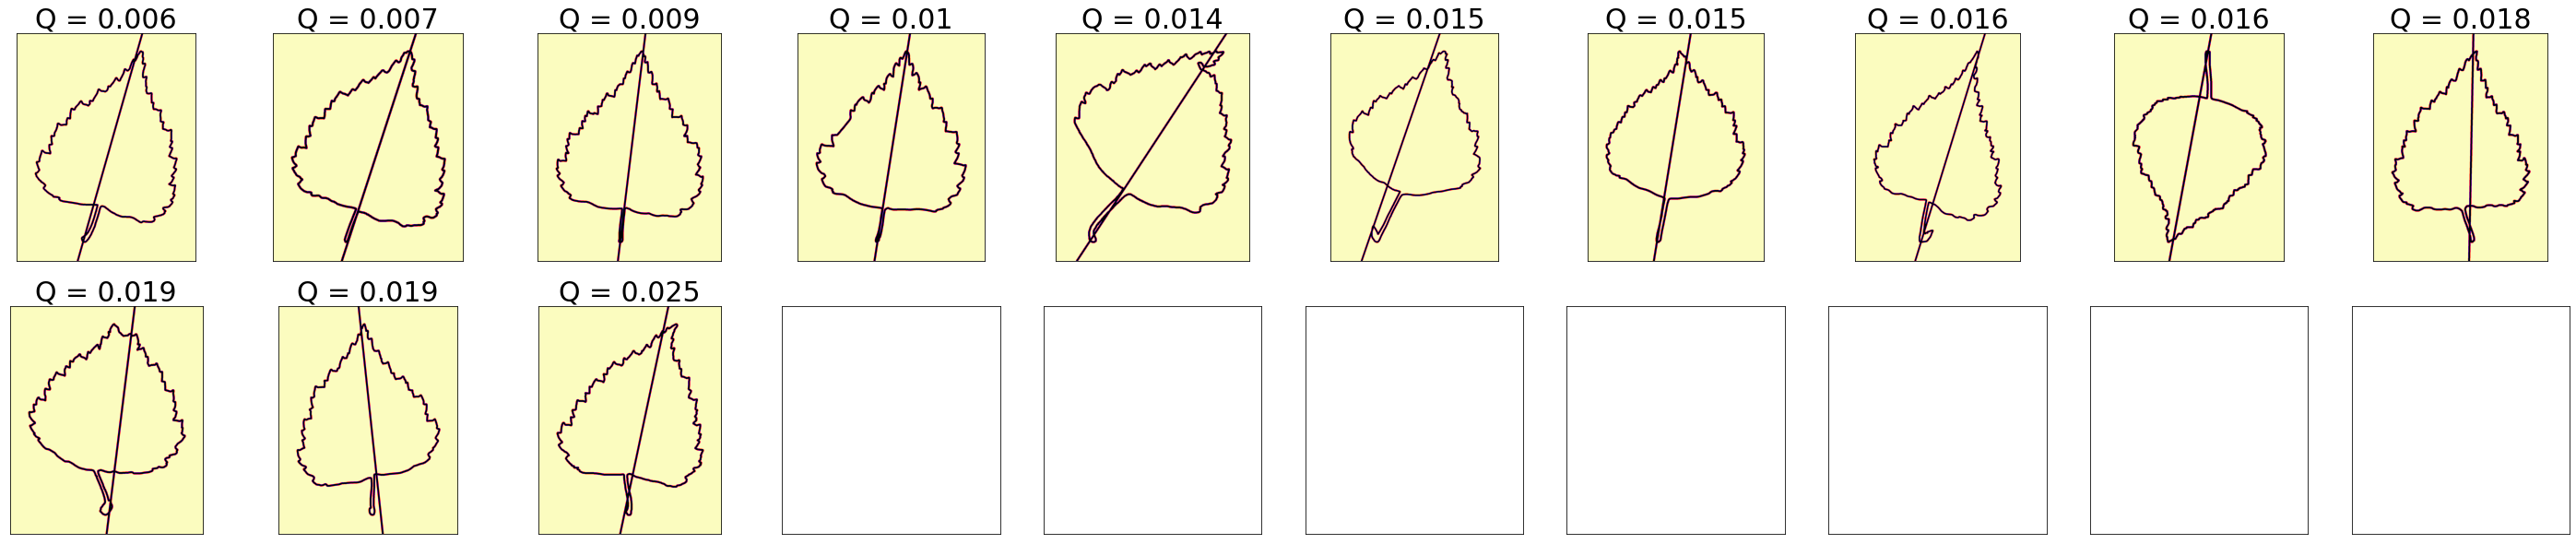

birch_Zaychik_dirty
Time = 49.297 s.


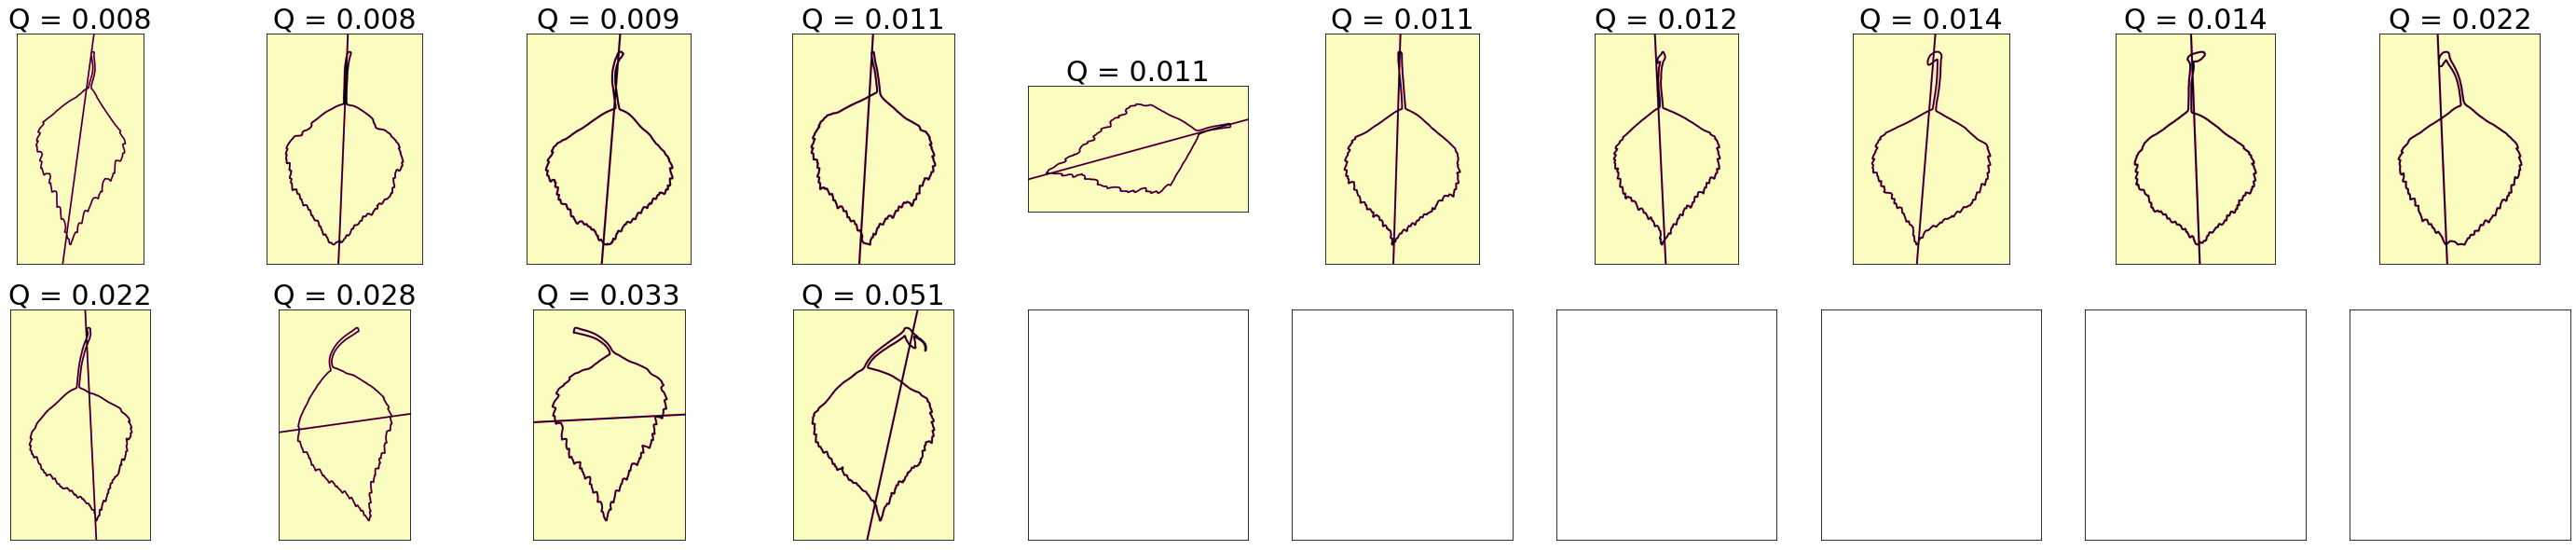

In [2]:
"""Birch leaves classification example"""
main_folder = '../data/leaves'
subfolders = None
np.random.seed(13)
s = zhu.Subploter(cols=10)
cs_kw = {
    'q_max_signal': np.inf, # 0.05,
    'q_max_pixels': np.inf, # 0.02,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'single': False,
    'min_area': 1e5,
    'sym_contour_kwargs': cs_kw,
}
s.parent_folder(main_folder, subfolders, sym_image_kwargs=im_kw)

In [1]:
%matplotlib inline

import os
from time import time

import numpy as np
from matplotlib import pyplot as plt

import zhu

from zhu.draw_tools import prepare_scene, imshow_bw

0.2477514310999473
0.005739413273771424

0.19950230535306035
0.008141840791482695

0.2174180728698669
0.007349975399251268

0.21233681083881542
0.01096440339016519

0.36445733202157027
0.02362654816370326

0.36982669211603214
0.00789048193522508

0.29778750479960325
0.016173220508100092

0.2626894371301147
0.012290739271966425

0.3114699288929187
0.009844853876422723

0.20715532936034656
0.013761179637141697

0.2530207064298068
0.015934096550546503

0.23009071063074105
0.011063533444195013

0.2540420732337318
0.017358931562408704



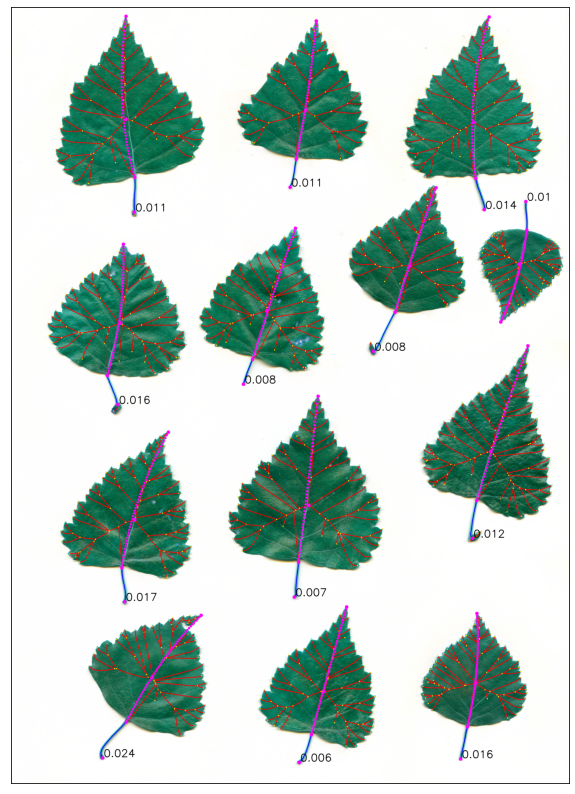

0.2329761793066149
0.0049459264456159545

0.3733386117790008
0.0064389182717544775

0.42961961268230797
0.00975056985114165

0.27012466597939966
0.011225788062288635

0.20832302413688744
0.009476999397671325

0.4224777068454256
0.00791686240321835

0.3828519264549459
0.012293491999423978

0.5024138418345103
0.008980232877903517

0.5026289200799129
0.012648925545934551

0.39548151477765575
0.008902404100182872

0.4575311162037344
0.008063784290158358

0.32578744088817096
0.009588010557027906

0.2682675733530057
0.014881622029744374

0.3877660005530555
0.006695957548092163



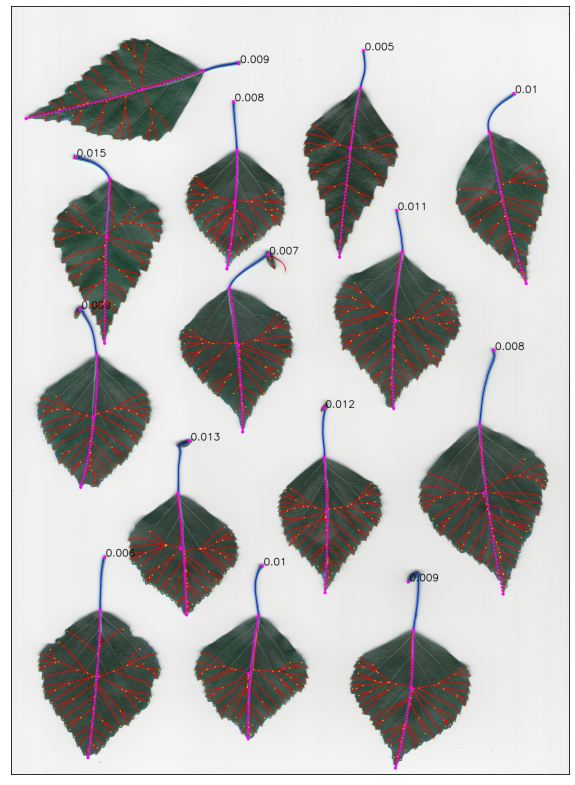

In [6]:
cs_kw = {
    'q_max_signal': np.inf, # 0.05,
    'q_max_pixels': np.inf, # 0.02,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}

im_kw = {
    'single': False,
    'min_area': 1e5,
    'sym_contour_kwargs': cs_kw,
}

parent = os.path.join('..', 'data', 'leaves')
for folder in os.listdir(parent):
    folder_path = os.path.join(parent, folder)
    if not os.path.isdir(folder_path):
        continue
    for name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, name)
        if not os.path.isfile(file_path):
            continue
        img = zhu.SymImage(folder_path, name, **im_kw)
        new_path = os.path.join(img.tmp_folder, name) + '.png'
        board = None
        for i, cnt in enumerate(img.Contours_list):
            skeleton = zhu.SkeletonBuilder(img, i, is_leave=True).Skeleton
            skeleton.sc_kwargs = cs_kw
            print(skeleton.leave_stalk_length_part)
            print(skeleton.SymContour.Sym_measure)
            board = skeleton.draw(board)
            print()
        prepare_scene(10, 20)
        imshow_bw(board[::-1], inverse=False)
        plt.savefig(new_path)
        plt.show()

In [3]:
from zhu import Vertex

In [4]:
size = (5100, 7019)

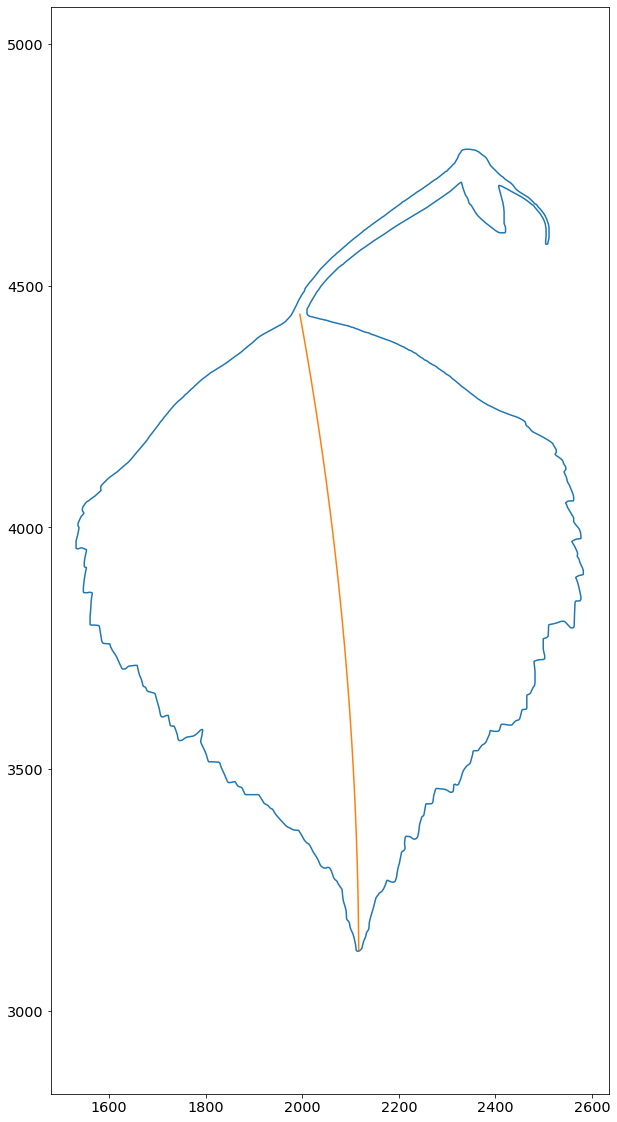

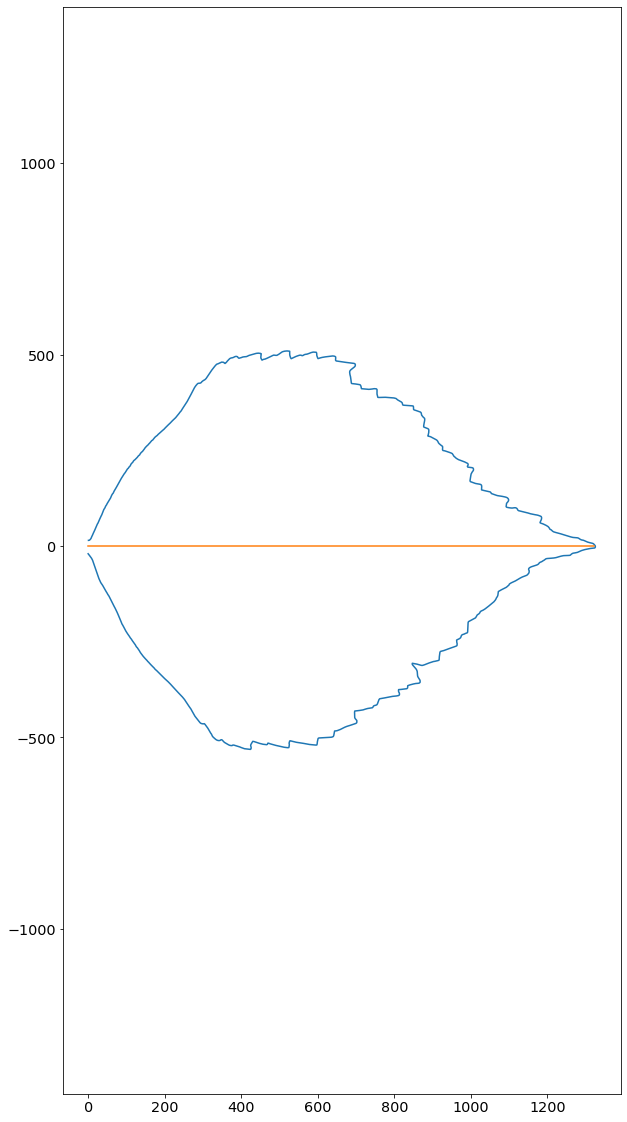

In [5]:
builder = zhu.SkeletonBuilder(img, i, is_leave=True)

sc = builder.Contour
s = sc.Signal
vs = [Vertex(np.real(s_), np.imag(s_)) for s_ in s]
plt.plot(np.real(s), np.imag(s))

skeleton = builder.Skeleton
curve = skeleton.body_curve.approx
plt.plot(curve[:, 0], curve[:, 1])
plt.axis('equal')
plt.show()

coords = [skeleton.body_curve.coord(v) for v in vs]
coords = np.array(coords)
coords = coords[coords[:, 0] >= 0]

plt.plot(coords[:, 0], coords[:, 1])
plt.plot([0, skeleton.body_curve.length], [0, 0])
plt.axis('equal')
plt.show()